In [2]:
import sqlite3    
import pandas as pd 
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error  
from math import sqrt 
from sklearn import metrics

In [12]:
cnx=sqlite3.connect('Desktop/database.sqlite')
df=pd.read_sql_query("SELECT * FROM Player_Attributes",cnx)
df.head()


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [13]:
df.drop(['id','player_fifa_api_id','player_api_id','date'],axis=1,inplace=True)

In [14]:
df.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [15]:
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline


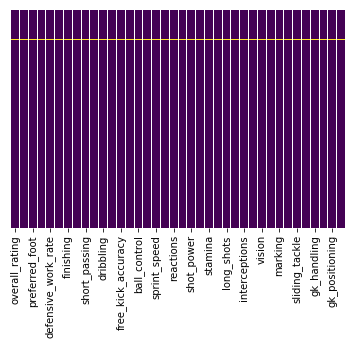

In [16]:
sns.heatmap(df.isnull(),xticklabels='auto',yticklabels=False,cbar=False,cmap='viridis')

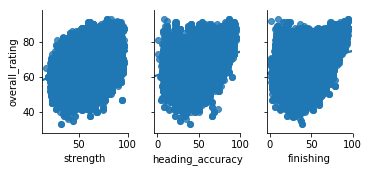

In [22]:
sns.pairplot(df.head(100000), x_vars=['strength','heading_accuracy','finishing'], y_vars='overall_rating', aspect=0.7, kind='reg')


In [24]:
df.columns

Index(['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [25]:
df['attacking_work_rate']=df.attacking_work_rate.map({
    'low':'low','medium':'medium','high':'high',None:None,'norm':None,'stoc':None, 'None':None,'le':None,'y':None})
pd.Categorical(df['attacking_work_rate']).describe()

,counts,freqs
categories,,
high,42823,0.232762
low,8569,0.046576
medium,125070,0.679810
NaN,7516,0.040853


In [26]:
df['defensive_work_rate']=df.defensive_work_rate.map({
    '6':None, '9':None, 'high':'high', '_0':None, 'tocky':None, '8':None, 'o':None, None:None, 'ormal':None, 'medium':'medium','4':None, '3':None, '2':None, 'es':None, '0':None, '7':None, '1':None, 'low':'low', 'ean':None, '5':None
})
pd.Categorical(df['defensive_work_rate']).describe()

,counts,freqs
categories,,
high,27041,0.146980
low,18432,0.100186
medium,130846,0.711205
NaN,7659,0.041630


In [27]:
df.dropna(inplace=True)

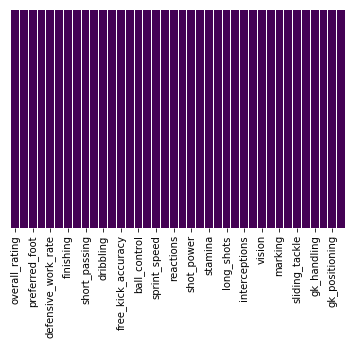

In [28]:
sns.heatmap(df.isnull(),xticklabels='auto',yticklabels=False,cbar=False,cmap='viridis')

In [29]:
df.isnull().sum()

overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0
gk_reflexes            0
dtype: int64

In [30]:
preferred_foot_df=pd.get_dummies(df.preferred_foot,prefix='pre_ft') 
attacking_work_rate = pd.get_dummies(df.attacking_work_rate,prefix='attack_wr')
defensive_work_rate = pd.get_dummies(df.defensive_work_rate,prefix='defense_wr')

In [31]:
df.shape

(176161, 38)

In [32]:
df.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [33]:
df = pd.concat([df,preferred_foot_df,attacking_work_rate,defensive_work_rate],axis=1)
df.drop(['preferred_foot','defensive_work_rate','attacking_work_rate'],inplace=True,axis=1)
df.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,gk_positioning,gk_reflexes,pre_ft_left,pre_ft_right,attack_wr_high,attack_wr_low,attack_wr_medium,defense_wr_high,defense_wr_low,defense_wr_medium
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,8.0,8.0,0,1,0,0,1,0,0,1
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,8.0,8.0,0,1,0,0,1,0,0,1
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,8.0,8.0,0,1,0,0,1,0,0,1
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,7.0,7.0,0,1,0,0,1,0,0,1
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,7.0,7.0,0,1,0,0,1,0,0,1


In [34]:
x_features =['potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'pre_ft_left', 'defense_wr_high', 'defense_wr_low',
       'attack_wr_high', 'attack_wr_low']
y_features=['overall_rating']

In [35]:
X=df.loc[:,x_features]
y=df.loc[:,y_features]

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [45]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,y_pred)) 
print('mean_squared_error: ',metrics.mean_squared_error(y_test,y_pred))


mean_absolute_error:  2.1212086026454013
mean_squared_error:  7.72954501630159


In [46]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score*100,'%')

84.43756028967707 %


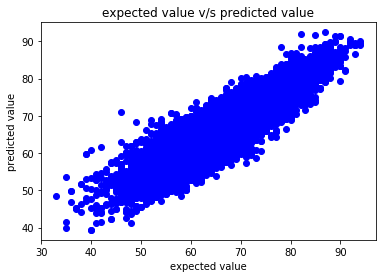

In [47]:
plt.scatter(y_test,y_pred,color='blue')
plt.title('expected value v/s predicted value')   
plt.xlabel('expected value')   
plt.ylabel('predicted value')   
plt.show()  